# Test Plot [x1, x2, x3], [y1, y2, y3]

In [1]:
import matplotlib.pyplot as plt
import numpy as np

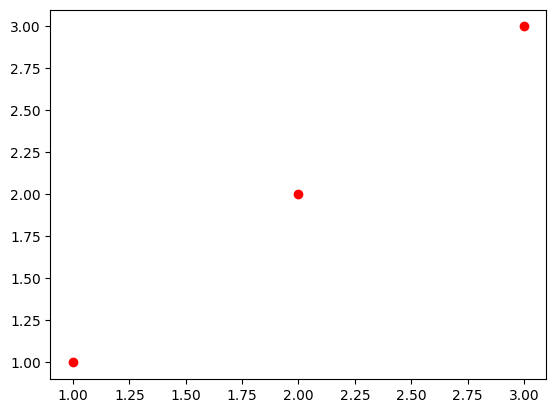

In [2]:
x = [1, 2, 3]
y = [1, 2, 3]
plt.plot(x, y, 'ro')

del x, y

## Test Plot Area

[reference](https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html#sphx-glr-gallery-lines-bars-and-markers-fill-between-demo-py)

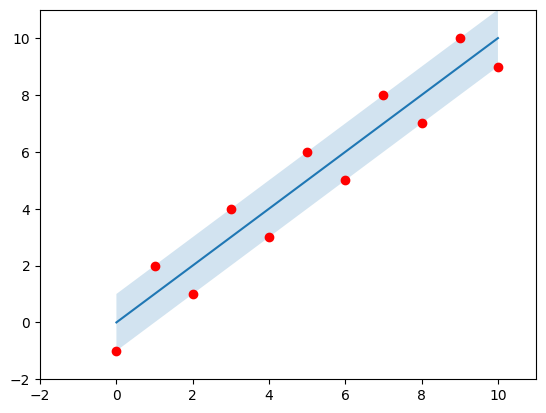

In [3]:
plt.xlim(-2, 11)
plt.ylim(-2, 11)

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [-1, 2, 1, 4, 3, 6, 5, 8, 7, 10, 9]
plt.plot(x, y, 'ro')

# y = x
x = [0,10]
y = [0,10]
plt.plot(x, y)

# fill_between
x = [0, 10]
y1 = [-1, 9]
y2 = [1, 11]
plt.fill_between(x, y1, y2, alpha=0.2)

del x, y, y1, y2

## Test loss function

In [4]:
np_y = np.array([1, 3])
np_ŷ = np.array([3, 2])

distances = np_ŷ - np_y
print(distances)
squares = distances ** 2
print(squares)

del np_y, np_ŷ, distances, squares

[ 2 -1]
[4 1]


In [5]:
# dots
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [-1, 2, 1, 4, 3, 6, 5, 8, 7, 10, 9]

# calculated from y = 1x + 0
ŷ = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# the loss function of linear regression is (ŷ - y)²
# other name is: the residual
def calculate_linear_regression_loss(ŷ: list[int], y: list[int]) -> int:
  # map to numpy array (for syntatic sugar)
  np_ŷ = np.array(ŷ)
  np_y = np.array(y)
  # measure distance between ŷ and y
  distances = np_ŷ - np_y
  # square each distance
  squares = distances ** 2
  # sum the squares
  return squares.sum()

print(calculate_linear_regression_loss(ŷ, y))

del x, y, ŷ

11


# Generating Training Data

In [6]:
from random import randrange
randrange(0, 1000) / 100

6.82

In [7]:
def generate_training_xy(n: int) -> list[list[int]]:
    training_data: list[list[int]] = []

    for _ in range(n):
        x = randrange(0, 1000) / 100
        y = randrange(0, 1000) / 100
        training_data.append([x, y])

    return training_data

generate_training_xy(n=10)

[[0.7, 4.2],
 [9.37, 0.75],
 [9.37, 3.69],
 [2.92, 7.23],
 [9.72, 7.93],
 [3.85, 4.71],
 [2.78, 1.89],
 [4.88, 6.97],
 [2.84, 7.76],
 [0.68, 2.93]]

# [[x1, y1], [x2, y2]] -> ([x1, x2], [y1, y2])

In [8]:
import numpy as np

In [9]:
def separate_training_xy_into_x_y(training_xy: list[list[int]]) -> tuple[list[int], list[int]]:
    array = np.array(training_xy)
    return array[:,0], array[:, 1]

training_xy = generate_training_xy(n=10)
print("training_data", training_xy)

training_x, training_y = separate_training_xy_into_x_y(training_xy=training_xy)
print("x_training", training_x)

del training_xy

training_data [[6.51, 0.04], [8.76, 3.82], [6.14, 2.39], [3.68, 7.63], [2.09, 2.55], [4.12, 7.97], [4.2, 6.1], [9.57, 9.06], [5.33, 4.96], [1.97, 4.22]]
x_training [6.51 8.76 6.14 3.68 2.09 4.12 4.2  9.57 5.33 1.97]


## Plot Training Data

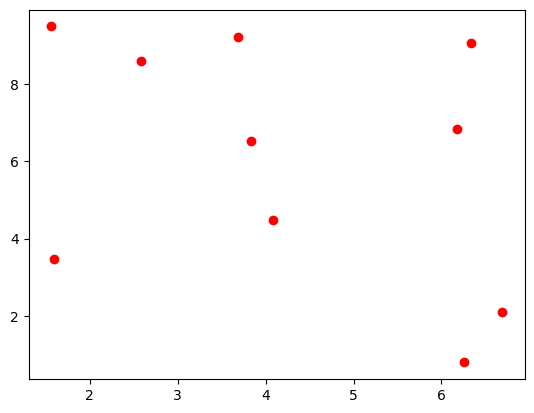

In [10]:
training_xy = generate_training_xy(10)
training_x, training_y = separate_training_xy_into_x_y(training_xy=training_xy)

plt.plot(training_x, training_y, 'ro')

del training_xy, training_x, training_y

# Code in Action

Reference:
1. [Linear Regression, Clearly Explained!!!](https://www.youtube.com/watch?%20v=7ArmBVF2dCs)
2. [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)
3. [The Main Ideas of Fitting a Line to Data (The Main Ideas of Least Squares and Linear Regression.)](https://www.youtube.com/watch?v=PaFPbb66DxQ)

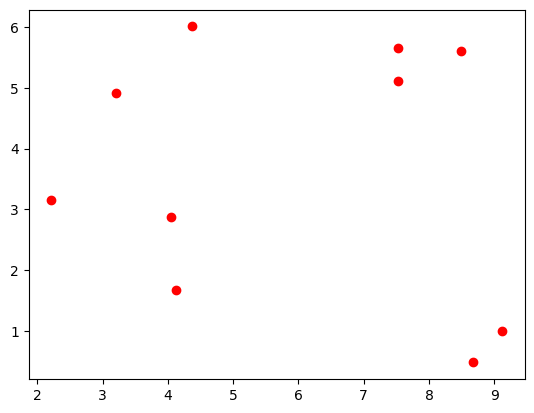

In [11]:
training_xy = generate_training_xy(10)
training_x, training_y = separate_training_xy_into_x_y(training_xy=training_xy)

plt.plot(training_x, training_y, 'ro')

del training_xy, training_x, training_y

In [12]:
# intention:
# avoiding reference. For example
# w = 0
# b = 0
# linear_regression_function = lambda x: w * x + b
# b += 1
# the linear_regression_function will be affected
class LinearRegression:
    w: int
    b: int

    def __init__(self, w: int, b: int) -> None:
        self.w = w
        self.b = b
    
    def calculate(self, x: int) -> int:
        return self.w * x + self.b

In [13]:
class LeastSquaresResult(object):
  w: int
  total_loss: int

  def __init__(self, w: int, total_loss: int):
    self.w = w
    self.total_loss = total_loss

In [14]:
# the w will be incremented by 0.01 which is not optimal.
# @todo gradient descent
def create_linear_regression_with_least_squares(training_x: list[int], training_y: list[int]) -> LinearRegression:
  current_iteration = 0
  max_iteration = 100

  w = -1
  b = 0

  data: list[LeastSquaresResult] = []

  while current_iteration < max_iteration:
    current_iteration += 1

    linear_regression = LinearRegression(w, b)
    ŷ = [linear_regression.calculate(i) for i in training_x]
    total_loss = calculate_linear_regression_loss(ŷ, training_y)
    # print(f'w={w:.2f} (ŷ - y)²={total_loss:.2f}')
    data.append(LeastSquaresResult(w=w, total_loss=total_loss))

    w += 0.1
    
  best = min(data, key=lambda x: x.total_loss)

  print(f'best total_loss={best.total_loss:.2f} ŷ={best.w:.2f} * x + {b:.2f}')

  return LinearRegression(best.w, b)

best total_loss=121.89 ŷ=0.80 * x + 0.00


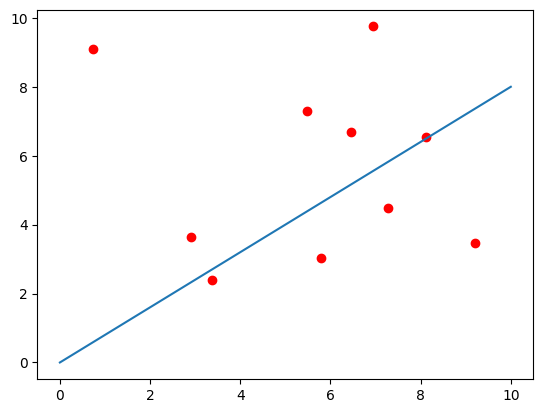

In [15]:
training_xy = generate_training_xy(10)
training_x, training_y = separate_training_xy_into_x_y(training_xy=training_xy)
plt.plot(training_x, training_y, 'ro')

linear_regression_with_least_squares = create_linear_regression_with_least_squares(training_x=training_x, training_y=training_y)
# visualize the graph
line_x = [0, 10]
line_y = [linear_regression_with_least_squares.calculate(i) for i in line_x]
plt.plot(line_x, line_y)

del training_xy, training_x, training_y, linear_regression_with_least_squares, line_x, line_y

In [16]:
class GradientDescentResult(object):
   b: int
   derivative_b_sum_squared_residuals: int

   def __init__(self, b: int, derivative_b_sum_squared_residuals: int):
      self.b = b
      self.derivative_b_sum_squared_residuals = derivative_b_sum_squared_residuals

def create_linear_regression_with_gradient_descent(training_xy: list[list[int]], w: int) -> LinearRegression:
  current_iteration = 0
  max_iteration = 100

  learning_rate = 0.01

  b = 0
  
  data: list[GradientDescentResult] = []

  while current_iteration < max_iteration:
    current_iteration += 1

    # (ŷ - y)² = (w * x + b - y)²
    # d/db (w * x + b - y)²
    # 2 * (w * x + b - y) * 1
    derivative_b_sum_squared_residuals = sum([2 * (w * x + b - y) for x, y in training_xy])
    # print(f'b={b:.2f} d/db (ŷ - y)²={derivative_b_sum_squared_residuals:.2f}')
    data.append(GradientDescentResult(b=b, derivative_b_sum_squared_residuals=derivative_b_sum_squared_residuals))
    
    step_size = derivative_b_sum_squared_residuals * learning_rate
    b = b - step_size

  # closest to 0
  best = min(data, key=lambda x: abs(x.derivative_b_sum_squared_residuals))

  print(f'best d/db (ŷ - y)²={best.derivative_b_sum_squared_residuals:.2f} ŷ={w:.2f} * x + {best.b:.2f}')

  return LinearRegression(w, best.b)

best total_loss=71.60 ŷ=0.90 * x + 0.00
best d/db (ŷ - y)²=-0.00 ŷ=0.90 * x + 0.74
best total_loss=66.15 ŷ=0.90 * x + 0.74


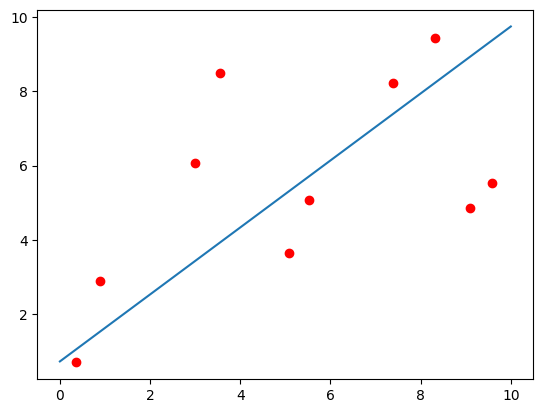

In [25]:
training_xy = generate_training_xy(10)
training_x, training_y = separate_training_xy_into_x_y(training_xy=training_xy)
plt.plot(training_x, training_y, 'ro')

linear_regression_with_least_squares = create_linear_regression_with_least_squares(training_x=training_x, training_y=training_y)
linear_regression_with_gradient_descent = create_linear_regression_with_gradient_descent(training_xy=training_xy, w=linear_regression_with_least_squares.w)
ŷ = [linear_regression_with_gradient_descent.calculate(i) for i in training_x]
total_loss = calculate_linear_regression_loss(ŷ, training_y)
print(f'best total_loss={total_loss:.2f} ŷ={linear_regression_with_gradient_descent.w:.2f} * x + {linear_regression_with_gradient_descent.b:.2f}')

# visualize the graph
line_x = [0, 10]
line_y = [linear_regression_with_gradient_descent.calculate(i) for i in line_x]
plt.plot(line_x, line_y)

del training_xy, training_x, training_y, linear_regression_with_least_squares, linear_regression_with_gradient_descent, line_x, line_y